In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [ ]:
dados = pd.read_csv('Breast_cancer_data.csv')
dados.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


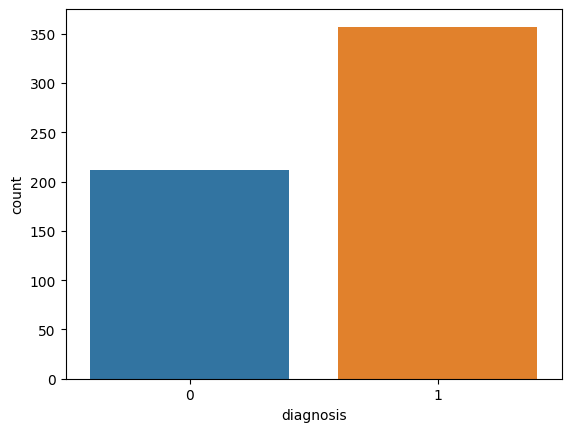

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
dados.info()

sns.countplot(x='diagnosis', data = dados)
plt.show()
dados['diagnosis'].value_counts()

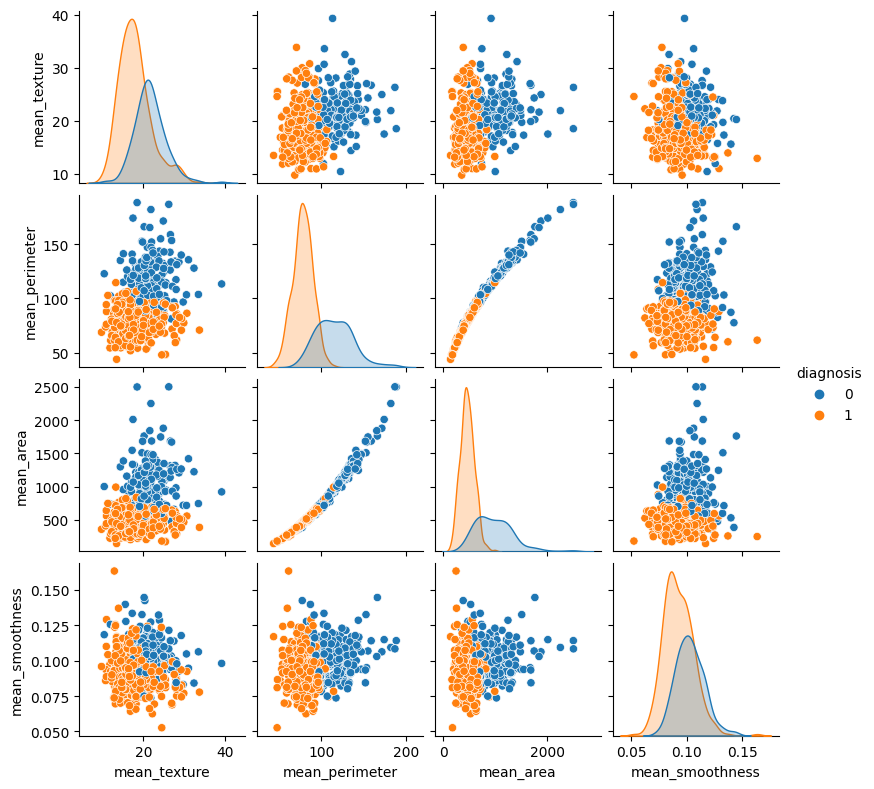

In [ ]:
# Criando o pairplot com tamanho ajustado
sns.pairplot(dados.iloc[:,1:6], hue="diagnosis", height=2)

# Exibindo o gráfico
plt.show()

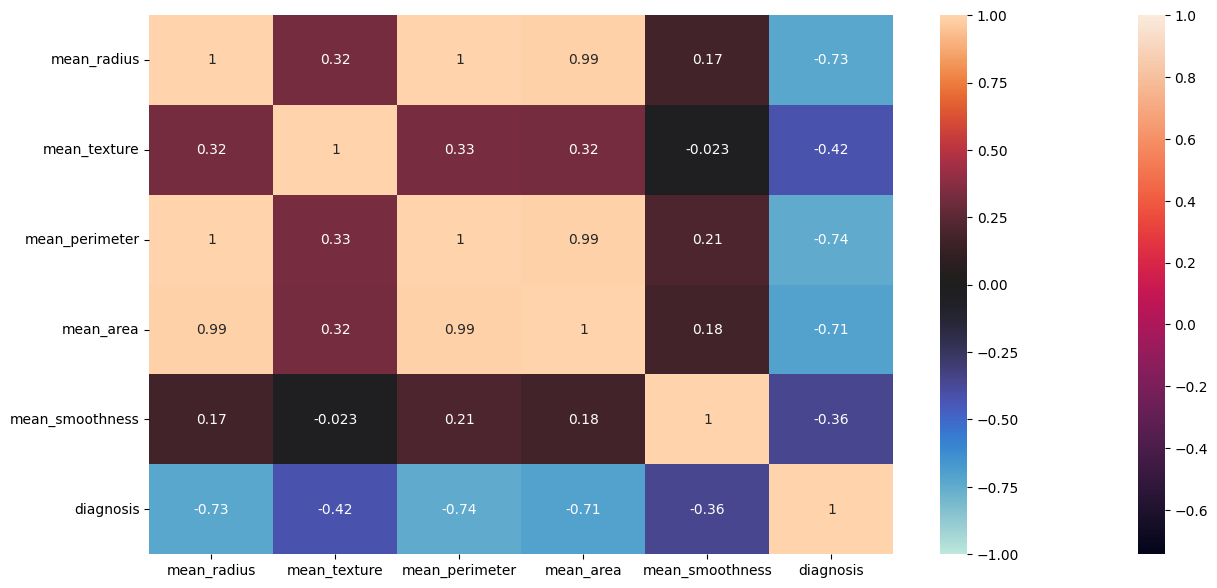

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(dados.corr())
ax = sns.heatmap(dados.corr(),vmin=-1,vmax=1,center=0,annot=True)
plt.show()

In [ ]:
X = dados.drop(columns={'diagnosis'}, axis=1)
y = dados['diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,  random_state = 1)
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(569, 5) (455, 5) (114, 5)
(569,) (455,) (114,)


In [ ]:
#Normalizando os dados
scaler = StandardScaler()
X_train_normalizado = scaler.fit_transform(X_train)
X_test_normalizado = scaler.transform(X_test)

print(X_train_normalizado)

[[ 0.05563811  0.89626203  0.12598506 -0.10039205  0.77312575]
 [ 1.27666753 -0.18552085  1.23829341  1.23932815  0.13888448]
 [-0.18050438  0.28481953 -0.1124559  -0.25363461  0.99757186]
 ...
 [-0.72190422 -1.02978185 -0.72707596 -0.68686169  0.32423353]
 [-0.53183831 -1.22967651 -0.58642492 -0.52814618 -1.41051769]
 [ 1.48689193 -0.79225995  1.45467962  1.47552909 -0.71545877]]


[[39  3]
 [ 3 69]]


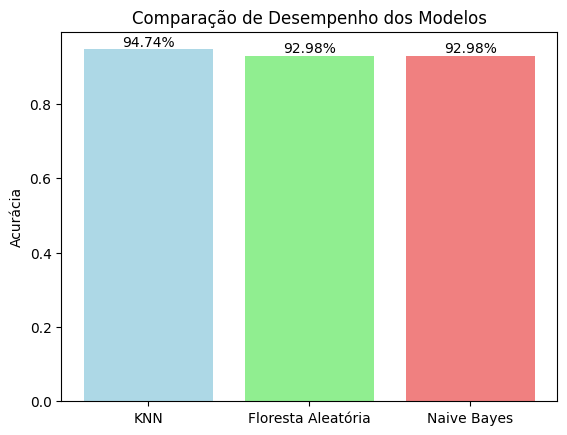

In [ ]:
from sklearn.metrics import confusion_matrix
# Aplicação do KNN
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train_normalizado, y_train)
knn_predictions = knn.predict(X_test_normalizado)
knn_accuracy = accuracy_score(y_test, knn_predictions)

cm = confusion_matrix(y_test, knn_predictions)
print(cm)

#Aplicação do Floresta Aleatória
rf = RandomForestClassifier(n_estimators=50,random_state=42,max_depth=50)
rf.fit(X_train_normalizado, y_train)
rf_predictions = rf.predict(X_test_normalizado)
rf_accuracy = accuracy_score(y_test, rf_predictions)

#pega a primeira árvore da floresta
#estimator = rf.estimators_[0]
#plt.figure(figsize=(20,15))
#plot_tree(estimator, filled=True, rounded=True, class_names=['0', '1'], feature_names=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], max_depth=3)
#plt.show()

# Aplicação do Naive Bayes
nb = GaussianNB()
nb.fit(X_train_normalizado, y_train)
nb_predictions = nb.predict(X_test_normalizado)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Gráfico
labels = ['KNN', 'Floresta Aleatória', 'Naive Bayes']
accuracies = [knn_accuracy, rf_accuracy, nb_accuracy]

plt.bar(labels, accuracies, color=['lightblue', 'lightgreen', 'lightcoral'])

for i in range(len(labels)):
    plt.text(i, accuracies[i], f'{accuracies[i]*100:.2f}%', ha = 'center', va='bottom')

plt.ylabel('Acurácia')
plt.title('Comparação de Desempenho dos Modelos')
plt.show()

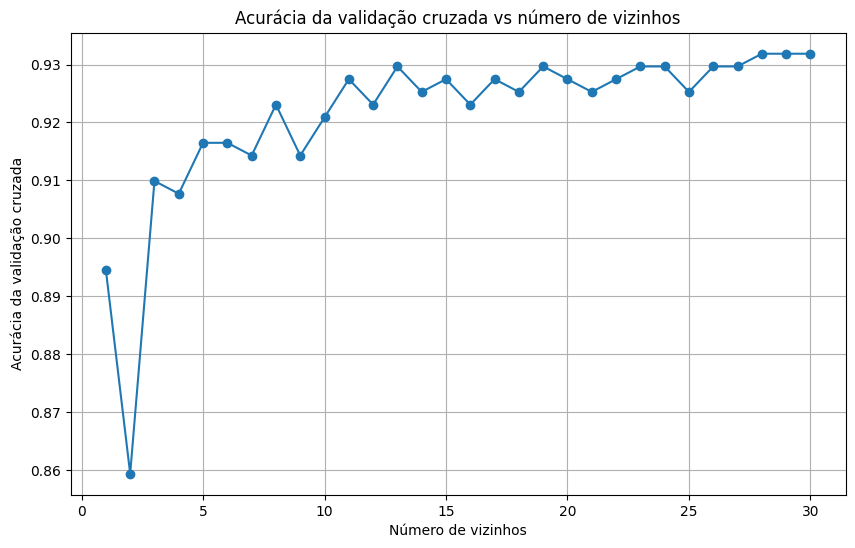

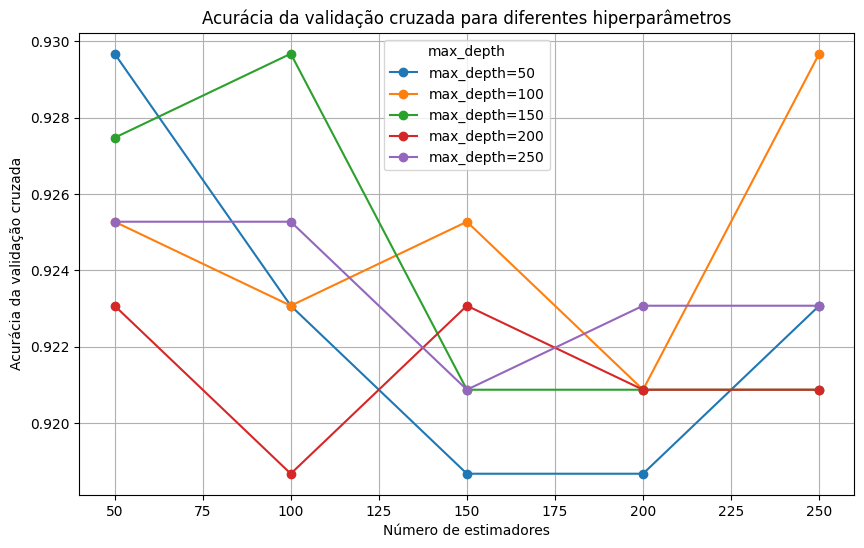

In [ ]:
# Para o KNN:
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': list(range(1, 31))}
knn_cv = GridSearchCV(knn, knn_grid, cv=5)
knn_cv.fit(X_train_normalizado, y_train)
knn_best_params = knn_cv.best_params_
knn_best_score = knn_cv.best_score_

plt.figure(figsize=(10, 6))
plt.plot(knn_cv.cv_results_['param_n_neighbors'].data, knn_cv.cv_results_['mean_test_score'], marker='o')
plt.title('Acurácia da validação cruzada vs número de vizinhos')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia da validação cruzada')
plt.grid()
plt.show()

# Para a Floresta Aleatória:
rf = RandomForestClassifier()
rf_grid = {'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 10, 20, 30, 40, 50]}
rf_cv = GridSearchCV(rf, rf_grid, cv=5)
rf_cv.fit(X_train_normalizado, y_train)
rf_best_params = rf_cv.best_params_
rf_best_score = rf_cv.best_score_

results = pd.DataFrame(rf_cv.cv_results_)

# Extrair as colunas relevantes
scores = results[['param_n_estimators', 'param_max_depth', 'mean_test_score']]

# Pivotar a tabela para que tenhamos n_estimators ao longo do eixo x, max_depth ao longo do eixo y, e a acurácia média como valores
scores = scores.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

# Configurar tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar a curva de validação cruzada
for depth, score in scores.items():
    plt.plot(scores.columns, score, marker='o', label=f"max_depth={depth}")

# Configura título, rótulos dos eixos e legenda
plt.title('Acurácia da validação cruzada para diferentes hiperparâmetros')
plt.xlabel('Número de estimadores')
plt.ylabel('Acurácia da validação cruzada')
plt.legend(title='max_depth')

# Configurar grade
plt.grid()

# Mostrar o gráfico
plt.show()